# Tajima and Dawson
## (Rev: 05/03/2019)

LWFA Workbook I

This is the first in a series of workbooks on laser wakefield acceleration (LWFA). This first notebook enables one to reproduce the simulations of T. Tajima and J. M. Dawson, "Laser Electron Accelerator." Phys. Rev. Lett. **43**, 267 (1979) which has now been cited over 4300 times. The notebook will also enable you to experiment with parameters beyond the original paper and prepare you for a follow up notebook (workbook II) that will enable you to study aspects of 1D LWFA including how the wake is excited, how the wake amplitude depends on the laser amplitude and shape, how the electron energy depends on the ratio of the laser and plasma frequency, and how the acceleration length depends on the dephasing of the electron and the wake and on the pump depletion of the laser.

In the original work of Tajima and Dawson the laser is intialized inside a plasma (both the electric and magnetic field and the plasma currents based on the linear dispersion relation). The laser pulse shape is rectangular (there are sharp rise and fall times and amplitude is constant over the defined pulse length). The laser is then allowed to propagate through the plasma. For numerical reasons the plasma has a high initial temperature of about 20keV, $kT_e/mc^2=(v_e/c)^2$ where $v_e/c=.2$. It is stated that the simulations "typically" use 512 cells with 10 plasma electrons per cell (the ions are a uniform neutralizing background). The cell size is chosen to be $\Delta=\lambda_0/15$ where $\lambda_0$ is the wavelength of the laser inside the plasma. The amplitude of the laser is chosen to be $eE_0/mc\omega_0=eA_0/mc^2=1$ where $\omega_0$ is the frequency of the laser assuming the linear dispersion is correct. The duration of the laser was chosen to be $c \tau_0=\pi c/\omega_p$. It is initialized between the $50\Delta$ and $81.4\Delta$ and it moves towards higher cell number.  The ratio $\omega_0/\omega_p$ can be obtained from the linear dispersion relation $D.R.$ where $c/\omega_p\Delta \equiv \bar c$ is what Tajima and Dawson call the "speed of light" for their simulation code. 

However, there is not sufficient detail to know when the simulations used "typical" parameters. We have assumed that the cell size was always chosen to be 1/15 of the laser wavelengtgh. We have then done our best to choose the number of cells and simulation length to "reproduce" the figures in the paper. However, we do not expect the agreement to be "perfect" and we stress that some of the parameters were chosen to to limiations of the simulations that no longer exist today. For example, they used a temperature of 20keV to avoid a numerical instability and they used a code they used a code based on using FFTs so that they always used a cell number that is a muliple of two so they did not have that much flexibility on the number of cells and simulation length.  

We begin by summarizing the parameters discussed in Tajima and Dawson for their 1D simulations:

* $L_x = 512\Delta$
* $v_e = .2 c$
* $k_x = 2\pi / 15\Delta$
* number of electrons = 5120
* particle size = $1\Delta$

where:
* $\Delta$ is the cell size
* $v_e \equiv \sqrt {kT_e/m}$ is the electron thermal speed

The following relations are kept fixed:
* $eE_0/m\omega = eB_0/m\omega = c$
* $L_t =c\tau_0 = \pi c/\omega_p$
* $p_0 = eE_0/\omega$
* $\omega/\omega_p = (1 + k_x^2c^2)^{1/2}=(1+(\bar c 2\pi/15)^2)^{1/2}$

where:
* $E_0$ and $B_0$ are the pump wave electric and magnetic field amplitudes
* $p_0$ is the corresponding amplitude for the momentum modulation

The laser is intialized via using:
* $E_y = E_0\sin k_x(x-x_0)$
* $B_z = B_0\sin k_x(x-x_0)$
* $p_y = p^{random}+p_0\cos k_x(x-x_0)$



The four cases run in Tajima Dawson varied the ratio of $\omega_0/\omega_p$ and the simulation length in units of $c/\omega_p$ by varying $\bar c =(5, 7.25, 10, 14.7)$.


So the four cases correspond to:

* $\omega_0/\omega_p =(2.32, 3.30, 4.31, 6.24)$

We guess that for these cases Tajima and Dawson used:

* $L_x \omega_p/c=(102.4, 102.4, 102.4, 139.264)$.


You are going to try to reproduce the Tajima and Dawson results using OSIRIS. In OSIRIS we use a different set of normalizations and we launch the laser from vacuum into the plasma. So the laser frquency is specified and the wavelength (wave number) self-consistently adjusts itself inside the plasma. In OSIRIS the particle shapes are sometimes smoother and a bit wider in terms of the cell that those used Tajima Dawson and this allows us to use lower temperatures.

OSIRIS simulations are done in normalized units. 

* Time:  $t' = t \omega_{p}$

* Frequency: $\omega' = \frac{\omega}{\omega_{p}}$ 

* Position: $\vec{x}' = \frac{\omega_{p}}{c} \vec{x}$  

* Momenta: $\vec{u}' = \frac{\vec{p}}{m_{e} c} = \frac{\vec{\gamma v}}{c} = \frac{\vec{u}} {c}$  

* Electric field: $\vec{E}' = e \frac{c / \omega_{p}}{m_{e} c^2} \vec{E}$  

* Magnetic field: $\vec{B}' = e \frac{c / \omega_{p}}{m_{e} c^2} \vec{B}$  


To try to "reproduce" the simulations in Tajima and Dawson with OSIRIS you should first try the following (they are actually already set up as cases A,B,C, and D which have the following parameters (note that because we are limited by multiple of two the number of cells we use different values than they may have used)  :

|   Normalized Sim Parameter	| Case A   	| Case B   	| Case C   	| Case D   	|
| --------- | ---------	| --------- | --------- | --------- |
| $\omega_0/\omega_p$  	|   2.32	|   3.30	|   4.31	|   6.24	|
| $ (n_0)$   |1|1|1|1|
| $a_{0}$  	|   1	|   1	|   1	|   1	|
|  $L_x \omega_p/c$ 	|   102.4	|   102.4	|   102.4	|   139.264	|
| $N_{cells}$ | 512 | 750 | 1024 |2048 |
| $\omega_p \Delta /c = N_{x}/L_{x}$ | .2 | .13 | .1 | .068 |
| $\omega_0 \Delta /c$ | .464 | .456 | .431 | .424 |
| $N_{pcell}$ | 10 | 10 | 10 | 10 |
| $v_{th} / c$ | 0.2 | 0.2 | 0.2 | 0.2 |
| $\omega_p \Delta t$ | .19 | .137 | .99 | .067 |
| $\omega_0 \Delta t$ | .45 | .45 | .43 | .42 |
| $\omega_P \tau_{rise}$ | 0 | 0 | 0 | 0 |
| $\omega_P \tau_{flat}$ | $\pi$ | $\pi$ | $\pi$ | $\pi$ |
| $\omega_P \tau_{fall}$ | 0 | 0 | 0 | 0 |

Although not needed to reproduce the Tajima and Dawson results we define $\tau_{rise}$ and $\tau_{fall}$ for exploration. The rise (and fall) of the laser amplitude (not intensity) is given by $eA/mc^2=a_0 [10 (t/\tau_{rise})^3-15(t/\tau_{rise})^4+6(t/\tau_{rise})^5]$. We have interpreted the paper to the best of our ability to determine the simulation parameters. As an open source project, we hope that users of this notebook will provide feedback including comments regarding how slight changes to the input parameters may lead to better agreement.

In [2]:
# **********************************
# **********************************
# First Run This Cell to 
# import the necessary libraries
# **********************************
# **********************************

# Please run this cell before running anything, and run this cell again if you have restarted the 
# python kernel.

# We first import necessary libraries

#
# This cell defines useful routines to diagnose the simulations here
#

import sys
b= sys.path
sys.path=['/home/jovyan/analysis'] + b
import osiris
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from osh5vis import new_fig, osplot
from osh5io import read_h5
from osh5utils import fft
import glob
from ipywidgets import interact_manual,fixed,Layout
import ipywidgets as widgets
interact_calc=interact_manual.options(manual_name="Make New Input and Run")
import os
from osiris import tajima

#Define some functions for later


def plot_maxgamma_t(simdir):
    
    maxg, time = [], []
    for f in sorted(glob.glob(simdir + '/MS/PHA/p1x1/electrons/*.h5')):
        data = read_h5(f)
        ind = np.nonzero(data)
        if len(ind[0]==0):
            maxg.append(np.sqrt(1+(data.axes[0][max(ind[0])])**2))
            time.append(data.run_attrs['TIME'])
    print('max gamma = ', max(maxg))
    
def newifile(iname='case0.txt', oname='case1.txt', uth=1e-6, 
             a0=1.0, omega0=2.0, t_flat=3.14, t_rise=0, t_fall=0,
            nx_p=1024, xmax=102.4, ndump=1, ppc=10):

    with open(iname) as osdata:
        data = osdata.readlines()

    for i in range(len(data)):
        if 'uth(1:3)' in data[i]:
            data[i] = 'uth(1:3) = '+str(uth)+' , '+str(uth)+' , '+str(uth)+',\n'
        if 'uth_bnd(1:3,1,1)' in data[i]:
            data[i] = 'uth_bnd(1:3,1,1) = '+str(uth)+' , '+str(uth)+' , '+str(uth)+',\n'
        if 'uth_bnd(1:3,2,1)' in data[i]:
            data[i] = 'uth_bnd(1:3,2,1) = '+str(uth)+' , '+str(uth)+' , '+str(uth)+',\n'
        if 'a0 =' in data[i] and 'omega0' not in data[i]:
            data[i] = 'a0 = '+str(a0)+',\n'
        if 'omega0 =' in data[i]:
            data[i] = 'omega0 = '+str(omega0)+',\n'
        if 't_flat =' in data[i]:
            data[i] = 't_flat = '+str(t_flat)+',\n'
        if 't_rise =' in data[i]:
            data[i] = 't_rise = '+str(t_rise)+',\n'
        if 't_fall =' in data[i]:
            data[i] = 't_fall = '+str(t_fall)+',\n'
        if 'nx_p(1:1) =' in data[i]:
            data[i] = 'nx_p(1:1) = '+str(nx_p)+',\n'
        if 'dt =' in data[i]:
            dt = (0.98 * xmax / nx_p)
            data[i] = 'dt = '+str(dt)+'e0'+',\n'
        if 'xmax(1:1) =' in data[i] and 'ps_xmax(1:1)' not in data[i]:
            data[i] = 'xmax(1:1) = '+str(xmax)+'e0,\n'
        if 'ps_xmax(1:1) =' in data[i]:
            data[i] = 'ps_xmax(1:1) = '+str(xmax)+',\n'
        if 'x(1:2,1) =' in data[i] and 'fx(1:2,1)' not in data[i]:
            data[i] = 'x(1:2,1) = 0.0, '+str(xmax)+',\n'
        if 'ndump =' in data[i]:
            data[i] = 'ndump = '+str(ndump)+',\n'
        if 'num_par_x(1:1) =' in data[i]:
            data[i] = 'num_par_x(1:1) = '+str(ppc)+',\n'

    with open(oname,'w') as f:
        for line in data:
            f.write(line)
    
    print('New file '+oname+' is written.')
    dirname = oname.strip('.txt')
    print('Running OSIRIS in directory '+dirname+'...')
    osiris.runosiris(rundir=dirname,inputfile=oname,print_out='yes')
    plot_maxgamma_t(dirname)
    print('Done')

## Here we illustrate and explore the OSIRIS pulse shape

In [2]:
# This cell shows the laser envelope shape for given t_rise, t_fall, and Lt.  
#
from ipywidgets import interact, fixed, FloatSlider
%matplotlib inline
def laser_envelope(trise,tflat,tfall):
    def osiris_env(tau):
        return(10*tau*tau*tau-15*tau*tau*tau*tau+6*tau*tau*tau*tau*tau)
    npoints=201
    total_range=(trise+tflat+tfall)
    dt=total_range/(npoints)
    xaxis=np.arange(0,total_range,dt)
    yaxis=np.zeros(npoints)
    yaxis_gaussian=np.zeros(npoints)
    x_midpoint=total_range/2.0
    
    for i in range(0,npoints):
        if (xaxis[i]<trise):
            yaxis[i]=osiris_env(xaxis[i]/trise)
        elif (xaxis[i]<(trise+tflat)):
            yaxis[i]=1.0
        else:
            yaxis[i]=osiris_env(np.abs(total_range-xaxis[i])/tfall)
        yaxis_gaussian[i]=np.exp(-(xaxis[i]-x_midpoint)**2/(trise/2*trise/2))
    plt.figure()
    if len(xaxis) == len(yaxis):
        plt.plot(xaxis,yaxis,label='OSIRIS Shape') 
        plt.plot(xaxis,yaxis_gaussian,label='Gaussian, $\sigma=t_{rise}/2$')
    else:
        plt.plot(xaxis,np.append(yaxis, 0),label='OSIRIS Shape') 
        plt.plot(xaxis,np.append(yaxis_gaussian, 0),label='Gaussian, $\sigma=t_{rise}/2$')
    plt.legend()
    plt.show()

interact(laser_envelope, trise=FloatSlider(min=0.00, max=5, step=.05, description='$t_{rise}$', value = 1.57),
         tflat=FloatSlider(min=0.00, max=5, step=.05, description='$Lt$', value = 0),
         tfall=FloatSlider(min=0.00, max=5, step=.05, description='$t_{fall}$', value = 1.57))


interactive(children=(FloatSlider(value=1.57, description='$t_{rise}$', max=5.0, step=0.05), FloatSlider(value…

<function __main__.laser_envelope(trise, tflat, tfall)>

### Below we use a fixed box to run the four simulations from the paper.

In [3]:
## Hit <shift>+<return> to run case A

dirname = 'casea-fixed'
osiris.runosiris(rundir=dirname,inputfile='casea-fixed.txt')
plot_maxgamma_t(dirname)
    

runosiris completed normally
max gamma =  6.860528985366879


Run the next cell to look at the results of the simulation. Click along the slider to see later timesteps. 

In [4]:
## Hit <shift>+<return> to visualize case A

dirname = './casea-fixed'
tajima(rundir=dirname)


interactive(children=(IntSlider(value=0, description='file_no', max=630, step=5), Output()), _dom_classes=('wi…

In [6]:
## Hit <shift>+<return> to run case B


dirname = 'caseb-fixed'
osiris.runosiris(rundir=dirname,inputfile='caseb-fixed.txt')
plot_maxgamma_t(dirname)
    

runosiris completed normally
max gamma =  10.215079001341175


In [7]:
## Hit <shift>+<return> to visualize case B


dirname = './caseb-fixed'
tajima(rundir=dirname)


interactive(children=(IntSlider(value=0, description='file_no', max=885, step=5), Output()), _dom_classes=('wi…

In [9]:
## Hit <shift>+<return> to run case C


dirname = 'casec-fixed'
osiris.runosiris(rundir=dirname,inputfile='casec-fixed.txt')
plot_maxgamma_t(dirname)
    

runosiris completed normally
max gamma =  26.512946254040195


In [10]:
## Hit <shift>+<return> to visualize case C


dirname = './casec-fixed'
tajima(rundir=dirname)


interactive(children=(IntSlider(value=0, description='file_no', max=1210, step=5), Output()), _dom_classes=('w…

In [11]:
## Hit <shift>+<return> to run case D


dirname = 'cased-fixed'
osiris.runosiris(rundir=dirname,inputfile='cased-fixed.txt')
plot_maxgamma_t(dirname)
    

runosiris completed normally
max gamma =  21.742087485065603


In [12]:
## Hit <shift>+<return> to visualize case D


dirname = './cased-fixed'
tajima(rundir=dirname)


interactive(children=(IntSlider(value=0, description='file_no', max=2235, step=5), Output()), _dom_classes=('w…

##  Case D did not achieve the predicted energy, so we tried again, with better spatial resolution.

In [13]:
dirname = 'cased-fixed-hires'
osiris.runosiris(rundir=dirname,inputfile='cased-fixed-hires.txt')
plot_maxgamma_t(dirname)
    

runosiris completed normally
max gamma =  14.786680607841724


In [14]:
dirname = './cased-fixed-hires'
tajima(rundir=dirname)


interactive(children=(IntSlider(value=0, description='file_no', max=400, step=5), Output()), _dom_classes=('wi…

## In the next cell we try to replicate Figure 2a in the paper.

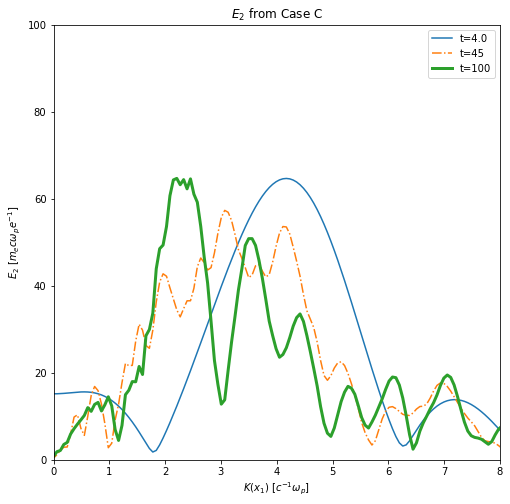

In [3]:
dirname = './casec-fixed'
plt.figure(figsize=(8,8))
osplot(np.abs(fft(read_h5(dirname+'/MS/FLD/e2/e2-000040.h5'))), xlim=[0, 8], ylim=[0, 100],linestyle='-')
osplot(np.abs(fft(read_h5(dirname+'/MS/FLD/e2/e2-000490.h5'))), xlim=[0, 8], ylim=[0, 100],linestyle='-.')
osplot(np.abs(fft(read_h5(dirname+'/MS/FLD/e2/e2-001050.h5'))), xlim=[0, 8], ylim=[0, 100],linewidth=3)
plt.title('$E_2$ from Case C')
plt.legend(['t=4.0', 't=45', 't=100'])
plt.show()

### Simulation Sandbox --- Make your own simulation

In the widget below, enter these parameters and a name for the output. When the button is clicked, the function will run OSIRIS and print the maximum electron energy achieved. The output is saved in a directory with the same name as the output text file. 

There is the option below to make advanced changes to the input deck but the default values will match the simulations in the paper.

In [2]:
style = {'description_width': '350px'}
layout = Layout(width='55%')

a = widgets.Text(value='casec-fixed.txt', description='Template Input File:',style=style,layout=layout)
b = widgets.Text(value='case1.txt', description='New Output File:',style=style,layout=layout)
c = widgets.BoundedFloatText(value=0.2, min=0.0, max=2.0, description='v_e/c:',style=style,layout=layout)
d = widgets.FloatText(value=1.0,description='a0:',style=style,layout=layout)
e = widgets.BoundedFloatText(value=2.3, min=0, max=9.5, description='omega0:',style=style,layout=layout)
f = widgets.BoundedFloatText(value=3.14, min=0, max=100, description='Lt:',style=style,layout=layout)
g = widgets.BoundedFloatText(value=0, min=0, max=100, description='t_rise:',style=style,layout=layout)
h = widgets.BoundedFloatText(value=0, min=0, max=100, description='t_fall:',style=style,layout=layout)
nx_pw = widgets.IntText(value=1024, description='nx_p:', style=style, layout=layout)
xmaxw = widgets.FloatText(value=102.4, description='xmax:', style=style, layout=layout)
ndumpw = widgets.IntText(value=1, description='ndump:', style=style, layout=layout)
ppc = widgets.IntText(value=10, description='Particles per cell:', style=style, layout=layout)

interact_calc(newifile, iname=a,oname=b,uth=c,a0=d,omega0=e,t_flat=f, 
              t_rise=g, t_fall=h, nx_p=nx_pw, xmax=xmaxw, ndump=ndumpw, ppc=ppc);


interactive(children=(Text(value='casec-fixed.txt', description='Template Input File:', layout=Layout(width='5…

In [30]:
# Here we can examine the simulation that we just made with the widget

dirname = './case1'
tajima(rundir=dirname)

interactive(children=(IntSlider(value=0, description='file_no', max=3050, step=25), Output()), _dom_classes=('…

## Moving Window Cases

In [6]:
dirname = 'casea-moving-24'
osiris.runosiris(rundir=dirname,inputfile='casea-moving-24.txt')
plot_maxgamma_t(dirname)
    

runosiris completed normally
max gamma =  9.188905581433152


In [7]:
dirname = './casea-moving-24'
tajima(rundir=dirname)

interactive(children=(IntSlider(value=0, description='file_no', max=21050, step=50), Output()), _dom_classes=(…

In [8]:
dirname = 'caseb-moving-24'
osiris.runosiris(rundir=dirname,inputfile='caseb-moving-24.txt')
plot_maxgamma_t(dirname)
    

runosiris completed normally
max gamma =  18.720359541865655


In [10]:
dirname = './caseb-moving-24'
tajima(rundir=dirname)

interactive(children=(IntSlider(value=0, description='file_no', max=21050, step=50), Output()), _dom_classes=(…

In [11]:
dirname = 'casec-moving-24'
osiris.runosiris(rundir=dirname,inputfile='casec-moving-24.txt')
plot_maxgamma_t(dirname)
    

runosiris completed normally
max gamma =  23.198543346358885


In [8]:
dirname = './casec-moving-24'
tajima(rundir=dirname)

interactive(children=(IntSlider(value=0, description='file_no', max=21050, step=50), Output()), _dom_classes=(…

In [3]:
dirname = 'cased-moving-24'
osiris.runosiris(rundir=dirname,inputfile='cased-moving-24.txt')
plot_maxgamma_t(dirname)
    

runosiris completed normally
max gamma =  45.97649393210079


In [4]:
dirname = './cased-moving-24'
tajima(rundir=dirname)

interactive(children=(IntSlider(value=0, description='file_no', max=20200, step=50), Output()), _dom_classes=(…

## Simulation Sandbox, with moving window
The cell below allows you to explore different parameters with a moving window.

In [5]:
style = {'description_width': '350px'}
layout = Layout(width='55%')

a = widgets.Text(value='casea-moving-24.txt', description='Template Input File:',style=style,layout=layout)
b = widgets.Text(value='case1-moving.txt', description='New Output File:',style=style,layout=layout)
c = widgets.BoundedFloatText(value=0.0001, min=0.0, max=2.0, description='v_e/c:',style=style,layout=layout)
d = widgets.FloatText(value=1.0,description='a0:',style=style,layout=layout)
e = widgets.BoundedFloatText(value=10.0, min=0, max=10.5, description='omega0:',style=style,layout=layout)
f = widgets.BoundedFloatText(value=3.14, min=0, max=100, description='t_flat:',style=style,layout=layout)
g = widgets.BoundedFloatText(value=0, min=0, max=100, description='t_rise:',style=style,layout=layout)
h = widgets.BoundedFloatText(value=0, min=0, max=100, description='t_fall:',style=style,layout=layout)
nx_pw = widgets.IntText(value=2400, description='Number of cells:', style=style, layout=layout)
xmaxw = widgets.FloatText(value=24, description='xmax:', style=style, layout=layout)
ndumpw = widgets.IntText(value=1, description='ndump:', style=style, layout=layout)
ppc = widgets.IntText(value=10, description='Particles per cell:', style=style, layout=layout)

interact_calc(newifile, iname=a,oname=b,uth=c,a0=d,omega0=e,t_flat=f, 
              t_rise=g, t_fall=h, nx_p=nx_pw, xmax=xmaxw, ndump=ndumpw, ppc=ppc);


interactive(children=(Text(value='casea-moving-24.txt', description='Template Input File:', layout=Layout(widt…

In [6]:
dirname = './case1-moving'
tajima(rundir=dirname)

interactive(children=(IntSlider(value=0, description='file_no', max=20400, step=50), Output()), _dom_classes=(…